In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

## Intro
let's start by drawing some kets and changing ket state using some gates
for some reasons, i can't find ~/.qiskit in my laptop, so I'll add parameter inside each draw method

In [2]:
qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw('latex')

<IPython.core.display.Latex object>

In [3]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

In [4]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

In [5]:
qc.x(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

In [6]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

## Create entanglement

In [7]:
# Let's create a fresh quantum circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

In [8]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

and that, is an entangled state

## Superdense coding

Intro to sending and receiving messages

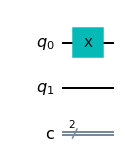

In [9]:
# The message - play with it
MESSAGE = '01'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)
    
qc_alice.draw('mpl')

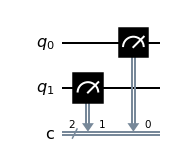

In [10]:
# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([1,0],[1,0])

qc_bob.draw('mpl')

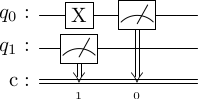

In [11]:
qc_alice.compose(qc_bob).draw('latex')

In [12]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'01': 1024}

In [13]:
qc_compose = qc_alice.compose(qc_bob)
backend.run(qc_compose).result().get_counts()

{'01': 1024}

Now add some entanglement - one way is to add cx gate after h gate

In [14]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

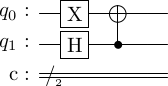

In [15]:
qc_alice.draw('latex')

Using above message encoding and circuit, Alice converts 2-qubit messages into entangled state:
![alt text](images/image1.png "message to entangled state")
which then Bob untangle it by doing the 'inverse'

In [16]:
qc_bob = QuantumCircuit(2,2)
# Bob untangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'01': 1024}

But above method doesn't take the advantage of entanglement.
Here's how

In [17]:
MESSAGE = '10'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

ket = Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

*check the ket for each message, especially for '10' and '01', compare with previous message encoding and circuit result*

In [18]:
qc_bob = QuantumCircuit(2,2)
# Bob untangles
qc_bob.cx(0,1)
qc_bob.h(0)
# Then measures
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'10': 1024}

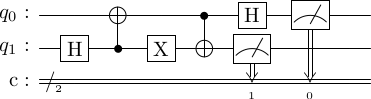

In [19]:
qc_alice.compose(qc_bob).draw('latex')

The important thing to note here is that the x and z gates can be applied to just a single qubit (qubit 1 in this case). This means that Alice could send qubit 0 to Bob as soon as she has created the entangled pair. In fact, she could send it before she even knows what message she wants to send!<br>
<br>
(from Qiskit textbook)

## Add Charlie
Another scenario: There's a third party, Charlie, whose job is just to create entangled states, send one qubit to Alice, and send another to Bob

In [20]:
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

ket = Statevector(qc_charlie)
ket.draw('latex')

<IPython.core.display.Latex object>

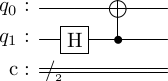

In [21]:
qc_charlie.draw('latex')

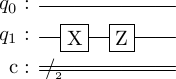

In [22]:
MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)
    
qc_alice.draw('latex')

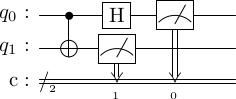

In [23]:
qc_bob.draw('latex')

In [24]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'11': 1024}

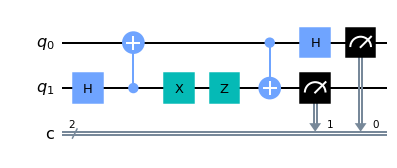

In [25]:
complete_qc.draw('mpl')

👍

commentary:<br>
it'd be better if we can do qc1 + qc2 + qc3 instead of qc1.compose(qc2.compose(qc3))